<a href="https://colab.research.google.com/github/mk17250/Telecom-Customer-Data/blob/main/Predicting_Churn_with_Telecom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I will use the Telecom Customer data set to predict churn by the company's customers 

In [19]:
### Import libraries 


%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [1]:
!pip install pandas-profiling==2.7.1

## I will use the pandas_profiling tool to perform explanatory data analysis 

In [4]:
pandas_profiling.ProfileReport(pd.read_csv('telecom_users.csv'))

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]



*   I have loaded the necessary libraries above 
*   I will now load the data into Google Colab 














In [3]:
from google.colab import files
uploaded = files.upload()

Saving telecom_users.csv to telecom_users.csv


In [207]:
df = pd.read_csv('telecom_users.csv')
df.head(n=10)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
7,6001,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8,1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,No,No,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


## I will now drop the unneeded unnamed column 



In [208]:
#drop first column as have customer ID already
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [209]:
## extract features 
features = df.columns
print(features)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [210]:
#check nan's
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b11355a50>,
      dtype=object)

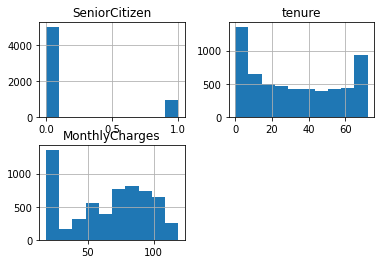

In [211]:
# plot distribution of numerical data in df
df.hist()

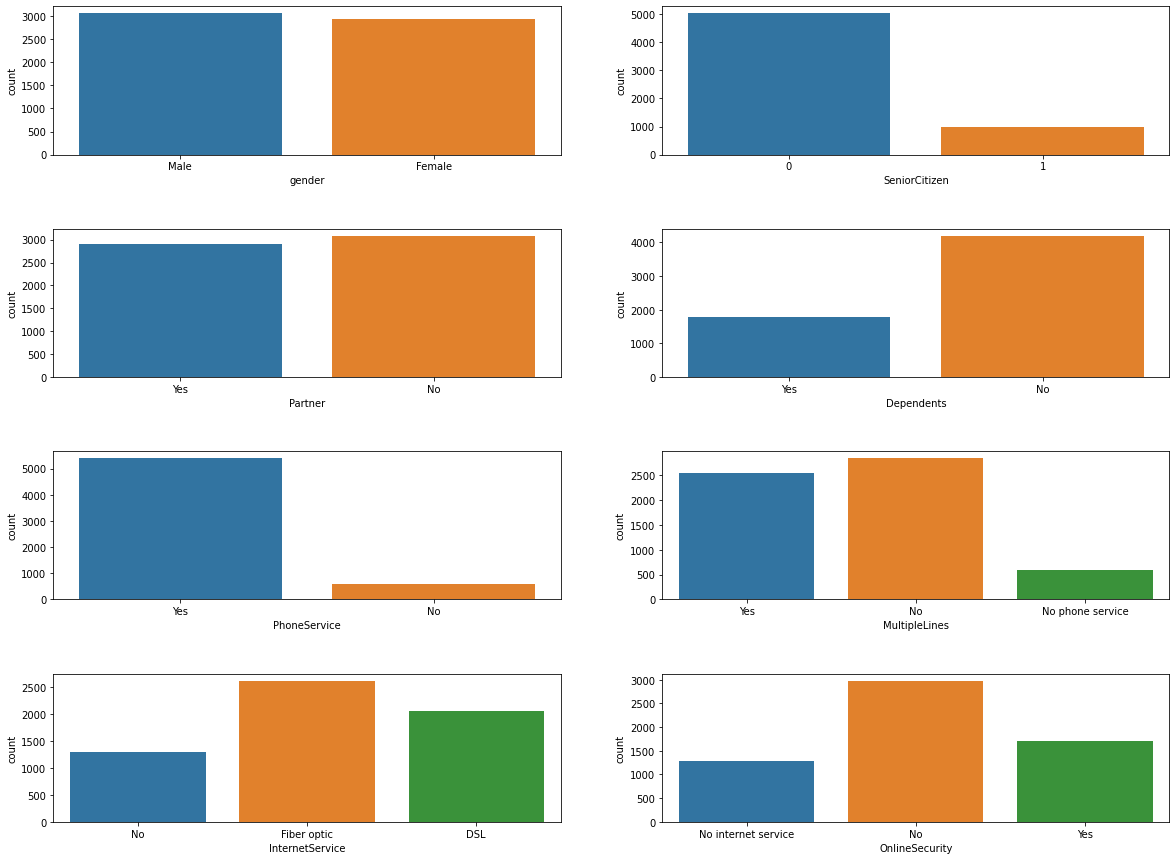

In [212]:
#Examine categorical data 
feature_1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity']
fig=plt.subplots(figsize=(20,15))
for i, j in enumerate(feature_1):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=0)
    plt.savefig('churn1.png')

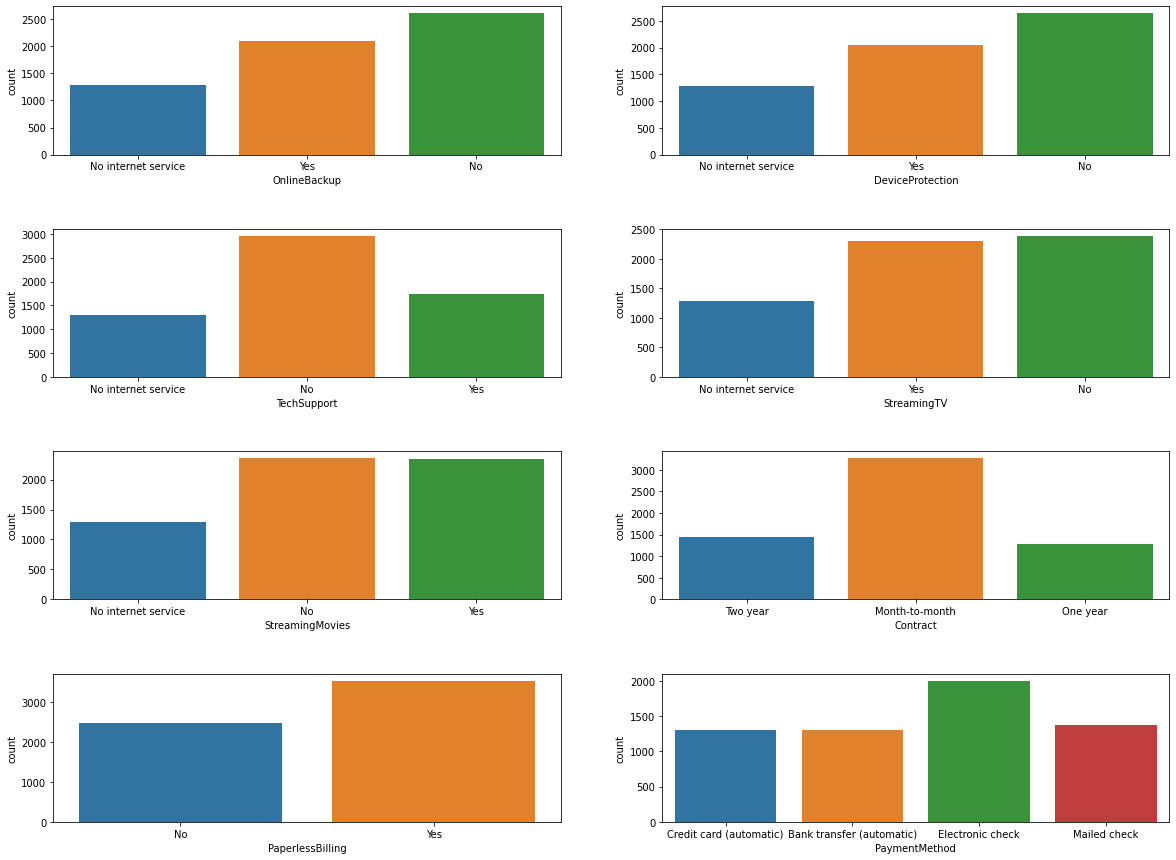

In [213]:
#examine categorical data - part 2 
feature_2 = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
fig=plt.subplots(figsize=(20,15))
for a, b in enumerate(feature_2):
    plt.subplot(4, 2, a+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=b, data = df)
    plt.xticks(rotation=0)
    plt.savefig('churn2.png')

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

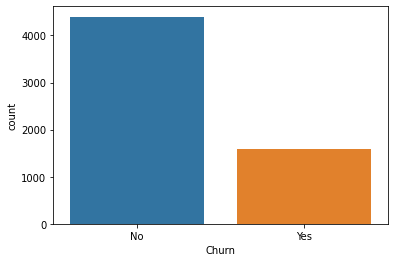

In [214]:
#Examine target varible 
sns.countplot(x= 'Churn', data = df)
plt.xticks(rotation=0)

In [215]:
#percemtage of churn = 
is_churn = df['Churn'] == 'Yes'
y_true = df.Churn[is_churn]

print("percent of people who churned is:" +str((y_true.shape[0] / df['Churn'].shape[0] * 100)))

percent of people who churned is:26.511861009021047


## Here I visualise each individual categorical feature against churn to assess the features impact on churn

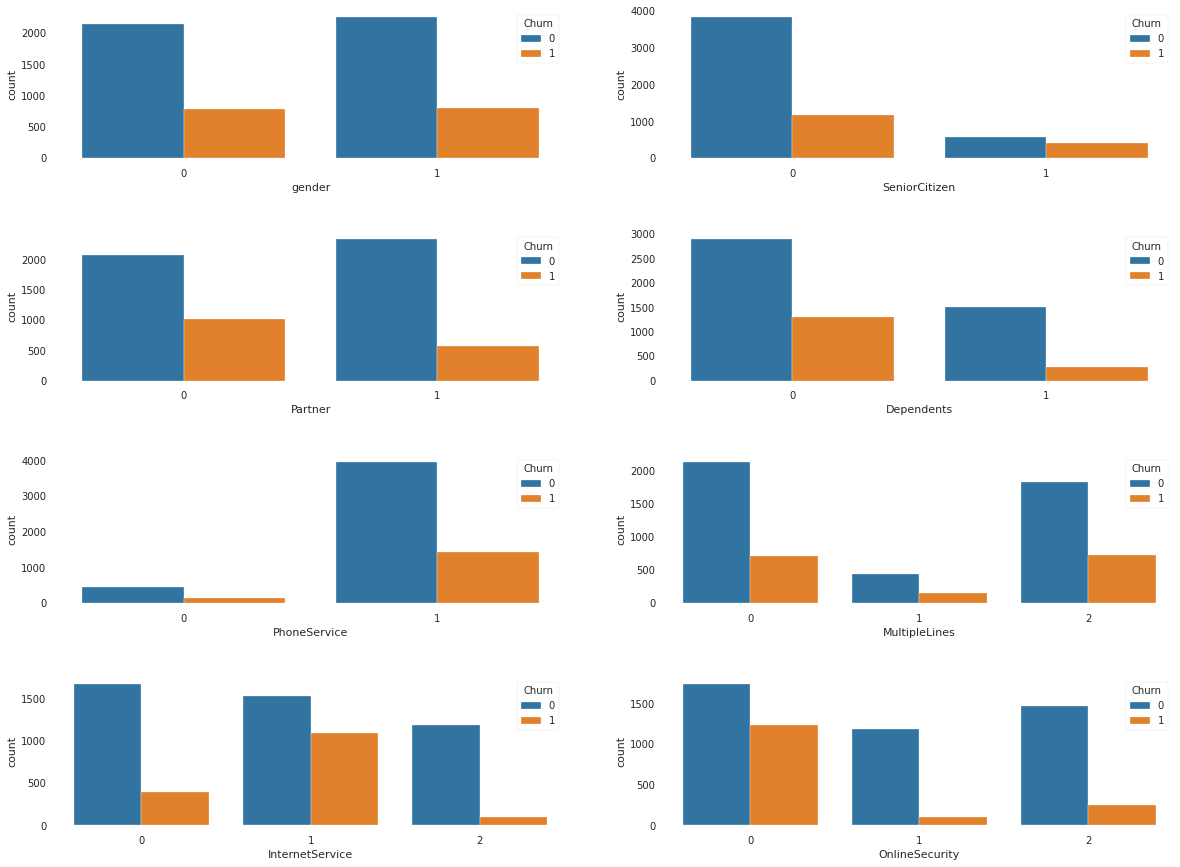

In [25]:
feature_1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity']
fig=plt.subplots(figsize=(20,15))
for i, j in enumerate(feature_1):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = df, hue='Churn')
    plt.xticks(rotation=0)
    plt.savefig('churn1.png')

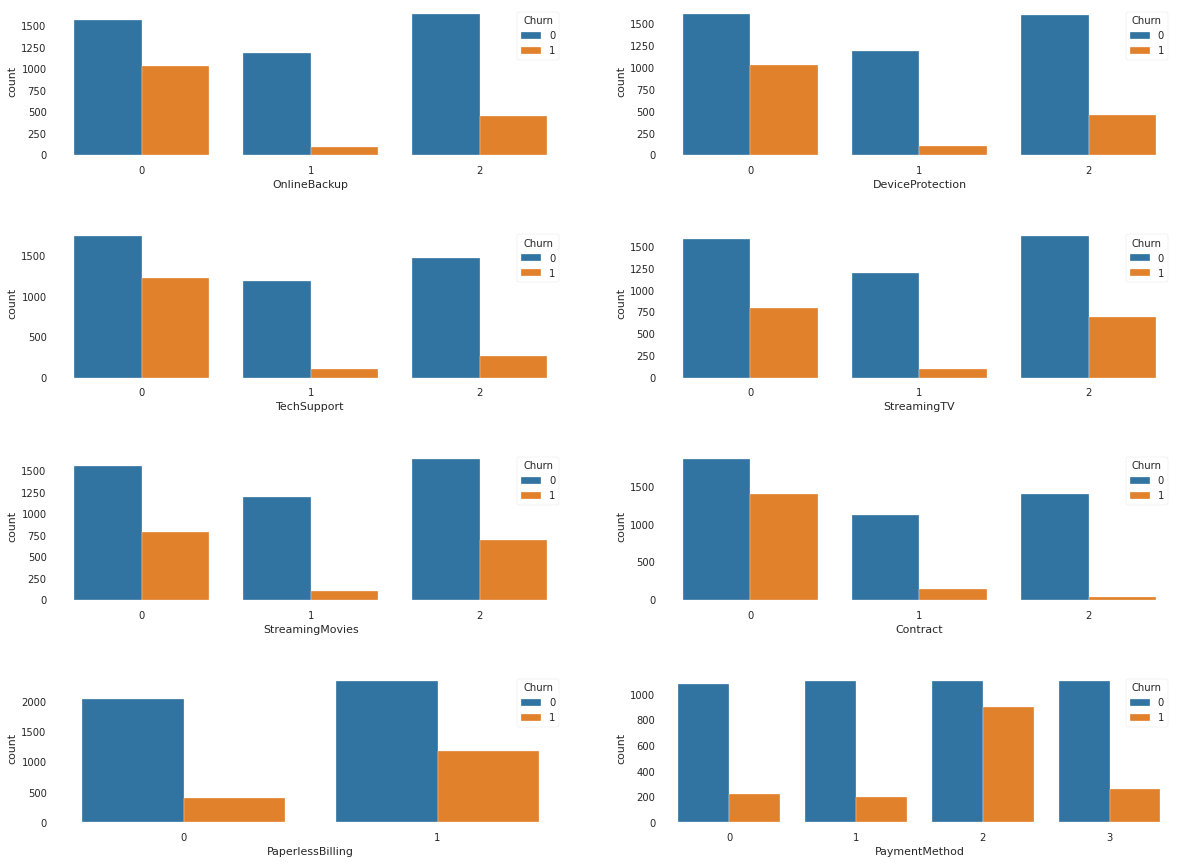

In [26]:
# categorical datas relationship with traget variable continued
feature_2 = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
fig=plt.subplots(figsize=(20,15))
for a, b in enumerate(feature_2):
    plt.subplot(4, 2, a+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=b, data = df, hue='Churn')
    plt.xticks(rotation=0)
    plt.savefig('churn2.png')

Having visualized the impact of the features on churn the following observations may be made.

The following featues have litte or no significance when predicting churn:

1.   Gender 
2.   Having a partner 
3.   Having mulitple lines  

The following observations can also be made:

1.   Senior citizens are less likely to leave the company, although the impact is negligible 
2.   Customers without dependants are more likely to leave the company 
3.   Customers with a phone service are more likely to leave the company 
4.   Conversley, customers without an internet service are less likely to leave the company
5.   In contrast to this, people with the fiber optic internet service contribute heavily to churn 
6.   Customers who recieve the month-to-month contract are more likely to leave
7.   Those who pay electronically are more likely to leave the company

The previous features and their apparant realtionship with churn are therefore worth exploring to help predict the churn of customers over time.






In [216]:
df = pd.get_dummies(df, columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],

       drop_first=True)

In [10]:
##df[["Churn"]] = df[["Churn"]].apply(LabelEncoder().fit_transform)

Label encoding will now be applied to the dataframe in order to turn string varaibles into numeric varaibles. 


In [217]:
## apply label encoder to categorical variables and assign values corresponding to amount of possible outputs
# df[["Churn"]] = df[["Churn"]].apply(LabelEncoder().fit_transform)
# df[["gender"]] = df[["gender"]].apply(LabelEncoder().fit_transform)
# df[["Partner"]] = df[["Partner"]].apply(LabelEncoder().fit_transform)
# df[["Dependents"]] = df[["Dependents"]].apply(LabelEncoder().fit_transform)
# df[["PhoneService"]] = df[["PhoneService"]].apply(LabelEncoder().fit_transform)
# df[["MultipleLines"]] = df[["MultipleLines"]].apply(LabelEncoder().fit_transform)
# df[["InternetService"]] = df[["InternetService"]].apply(LabelEncoder().fit_transform)
# df[["OnlineSecurity"]] = df[["OnlineSecurity"]].apply(LabelEncoder().fit_transform)
# df[["OnlineBackup"]] = df[["OnlineBackup"]].apply(LabelEncoder().fit_transform)
# df[["DeviceProtection"]] = df[["DeviceProtection"]].apply(LabelEncoder().fit_transform)
# df[["StreamingTV"]] = df[["StreamingTV"]].apply(LabelEncoder().fit_transform)
# df[["TechSupport"]] = df[["TechSupport"]].apply(LabelEncoder().fit_transform)
# df[["StreamingMovies"]] = df[["StreamingMovies"]].apply(LabelEncoder().fit_transform)
# df[["Contract"]] = df[["Contract"]].apply(LabelEncoder().fit_transform)
# df[["PaperlessBilling"]] = df[["PaperlessBilling"]].apply(LabelEncoder().fit_transform)
# df[["StreamingTV"]] = df[["StreamingTV"]].apply(LabelEncoder().fit_transform)
# df[["PaymentMethod"]] = df[["PaymentMethod"]].apply(LabelEncoder().fit_transform)
# print(df.columns)


In [218]:
#checking varaibles are now numeric and have element corresponding to their information 
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7010-BRBUU,72,24.10,1734.65,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
1,9688-YGXVR,44,88.15,3973.2,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,9286-DOJGF,38,74.95,2869.85,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,6994-KERXL,4,55.90,238.5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,2181-UAESM,2,53.45,119.5,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [219]:
## check types are sufficient
df.dtypes

customerID                                object
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                              object
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes     

In [220]:
## covert string to float (TotalCharges)
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors = 'coerce')


In [115]:
## check types are sufficient
df.dtypes

customerID                                object
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes     

In [221]:
## replaces spaces with null values
df['TotalCharges'] = df['TotalCharges'].replace("", np.nan)

#drop nans from column
df = df.dropna()


In [117]:
## check values for TotalCharges are as expect 
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7010-BRBUU,72,24.10,1734.65,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
1,9688-YGXVR,44,88.15,3973.20,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,9286-DOJGF,38,74.95,2869.85,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,6994-KERXL,4,55.90,238.50,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,2181-UAESM,2,53.45,119.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [222]:
## Perform feature scaling to standardize remaining numerical values 
from sklearn.preprocessing import StandardScaler

#Perform feature scaling pn 'tenure', 'Monthly charges', 'Total charges' in order to bring them onto the same scale 
standardScaler = StandardScaler()
columns_for_ft_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

#apply the fearure scaling operation on the datset using fit_transform() method
df[columns_for_ft_scaling] = standardScaler.fit_transform(df[columns_for_ft_scaling])

In [119]:
## check new values are as expected 
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7010-BRBUU,1.611381,-1.353483,-0.247769,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
1,9688-YGXVR,0.468468,0.774066,0.736669,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,9286-DOJGF,0.223558,0.335602,0.251453,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,6994-KERXL,-1.164265,-0.297182,-0.905725,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,2181-UAESM,-1.245901,-0.378564,-0.958057,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [71]:
# # the outcomes that I think are of interest are: 
# x = np.array(df[['gender', 
#         'SeniorCitizen', 'Partner', 'Dependents',
#        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
#        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
#        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
#        'PaymentMethod', 'MonthlyCharges', 'TotalCharges']])

# y = np.array(df.iloc[:,4])



In [223]:
x = np.array(df[['tenure', 'MonthlyCharges', 'TotalCharges',
       'Contract_One year', 'Contract_Two year', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']])

y = df['Churn_Yes']

In [ ]:
#check x and y are as expected
print(x[0:20,:])
print(y[0:20])

In [ ]:
!pip install imbalanced-learn

In [241]:
#Over sample the minority class using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

x_sm, y_sm = sm.fit_resample(x_train, y_train)

print(f'''Shape of x before SMOTE: {x_train.shape}
      Shape of x after SMOTE: {x_sm.shape}''')

Shape of x before SMOTE: (4272, 32)
      Shape of x after SMOTE: (6104, 32)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


percent of people who churned is now (%):50.0


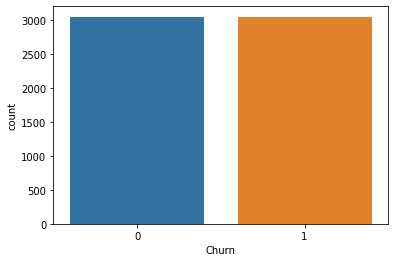

In [253]:
#Visualise target variable Churn 
yyy = y_sm
yyy = pd.DataFrame(yyy, columns = ['Churn'])
#Traget Varibale is now balanced
sns.countplot(x = 'Churn', data = yyy)
plt.xticks(rotation=0)
#percemtage of churn = 
is_churn = y_sm == 1
y_true = y_sm[is_churn]

print("percent of people who churned is now (%):" +str((y_true.shape[0] / y_sm.shape[0] * 100)))

In [254]:
## split into training and test data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.3, random_state = 50, shuffle=False)

In [122]:
# Import Machine Leanrning Classification Models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [235]:
#Fit logistic regression model 
logmodel = LogisticRegression(random_state=50)
logmodel.fit(x_train,y_train)

#predict the results
predict_lm = logmodel.predict(x_test)

#Calculate accuracy 
log_model_accuracy = round(metrics.accuracy_score(y_test, predict_lm) * 100, 2)
print("Logmodel accuracy:", log_model_accuracy)

Logmodel accuracy: 62.17


In [236]:
#Fit a Support Vector Machine Model
svcmodel = SVC(kernel = 'linear', random_state = 50, probability = True)
svcmodel.fit(x_train,y_train)

#predict results
svc_predict = svcmodel.predict(x_test)

#Calculate accuracy 
svc_accuracy = round(metrics.accuracy_score(y_test, svc_predict) * 100, 2)
print(" SVC model accuracy:", svc_accuracy)

 SVC model accuracy: 60.26


In [237]:
#Fit K-Nearest Neighbour model 
kmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 represents Euclidean distance 
kmodel.fit(x_train,y_train)

#Predict results
k_predict = kmodel.predict(x_test)

#Calcualte accuracy of the model 
k_accuracy = round(metrics.accuracy_score(y_test, k_predict) * 100, 2)
print("K-Nearest Neighbours model:", k_accuracy) 

K-Nearest Neighbours model: 81.17


In [238]:
#Fit Decesion Tree model
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50)
dtmodel.fit(x_train,y_train)

#Predict results
dt_predict = dtmodel.predict(x_test)

#Calculate accuracy
dt_accuracy = round(metrics.accuracy_score(y_test, dt_predict) * 100, 2)
print("Decesion Tree model accuracy:", dt_accuracy)

Decesion Tree model accuracy: 75.98


In [239]:
##Fit random forrest
rf_classifier = RandomForestClassifier(random_state = 50)
rf_classifier.fit(x_train,y_train)

#predict results
rf_predict = rf_classifier.predict(x_test)

#calculate accuracy 
rf_accuracy = round(metrics.accuracy_score(y_test, rf_predict) * 100, 2)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 89.14


In [240]:
#Creat table of accuracies 
model_comparison = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Support Vector Machine', 'K_Nearest Neighbours', 'Decesion Tree', 'Random Forest'],
    'Score' : [log_model_accuracy, svc_accuracy, k_accuracy, dt_accuracy, rf_accuracy]
})
Model_comparison_df = model_comparison.sort_values(by='Score', ascending=False)
Model_comparison_df = Model_comparison_df.set_index('Score')
Model_comparison_df.reset_index()

,Score,Model
0,89.14,Random Forest
1,81.17,K_Nearest Neighbours
2,75.98,Decesion Tree
3,62.17,Logistic Regression
4,60.26,Support Vector Machine


In [98]:
#Generate confusion matrix for model evauluation, will use logistic regression as has highet accuracy 

from sklearn.metrics import confusion_matrix
cm_logmodel = confusion_matrix(y_test, predict_lm)
cm_logmodel

array([[1205,  132],
       [ 218,  238]])

In [87]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(cm_logmodel, cmap="RdYlGn", annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(cm, cmap="RdYlGn", annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()